In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['OnlineNewsPopularityReduced.csv']


#### Підключіть необхідні бібліотеки.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.stats import pointbiserialr
sns.set(rc={'figure.figsize':(10, 8)}); # you can change this if needed

#### Завантажте дані. Вони знаходяться у директорії input.


In [3]:
df = pd.read_csv("../input/OnlineNewsPopularityReduced.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 61 columns):
url                              4954 non-null object
timedelta                        4954 non-null int64
n_tokens_title                   4954 non-null int64
n_tokens_content                 4954 non-null int64
n_unique_tokens                  4954 non-null float64
n_non_stop_words                 4954 non-null float64
n_non_stop_unique_tokens         4954 non-null float64
num_hrefs                        4954 non-null int64
num_self_hrefs                   4954 non-null int64
num_imgs                         4954 non-null int64
num_videos                       4954 non-null int64
average_token_length             4954 non-null float64
num_keywords                     4954 non-null int64
data_channel_is_lifestyle        4954 non-null int64
data_channel_is_entertainment    4954 non-null int64
data_channel_is_bus              4954 non-null int64
data_channel_is_socmed           495

Target variable is shares

#### Якого дня тижня було опубліковано більшість статей досліджуваного датасету? Якого дня публікувалося найменше статей? Візуалізуйте інформацію про дні тижня.

weekday_is_tuesday : 969
weekday_is_saturday : 314


Text(0, 0.5, 'Name weekday')

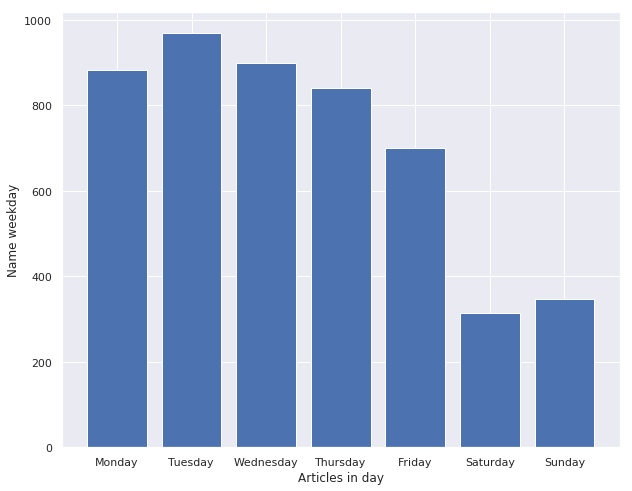

In [4]:
weekday = ["weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday"]
weekday_names = list(map(lambda x: x.split("_")[2].capitalize(), weekday))

max_day = 0
max_day_name = "weekday_is_monday"
min_day = df["weekday_is_monday"].value_counts()[1]
min_day_name = "weekday_is_monday"
pos = 0
count_days = []
for day in weekday:
    count_days.append(df[day].value_counts()[1])
    if max_day < df[day].value_counts()[1]: 
        max_day = df[day].value_counts()[1]
        max_day_name = day
    if min_day > df[day].value_counts()[1]:
        min_day = df[day].value_counts()[1]
        min_day_name = day
print(max_day_name, ":", max_day)
print(min_day_name, ":", min_day)
plt.bar(weekday_names, count_days)
plt.xlabel("Articles in day")
plt.ylabel("Name weekday")

We see that tuesday have max value and saturday min value

#### Що можна сказати про розподіл значень змінної **n_tokens_title**? Як пов'язана довжина заголовка статті з результуючою змінною?

Text(0, 0.5, 'Num of articles')

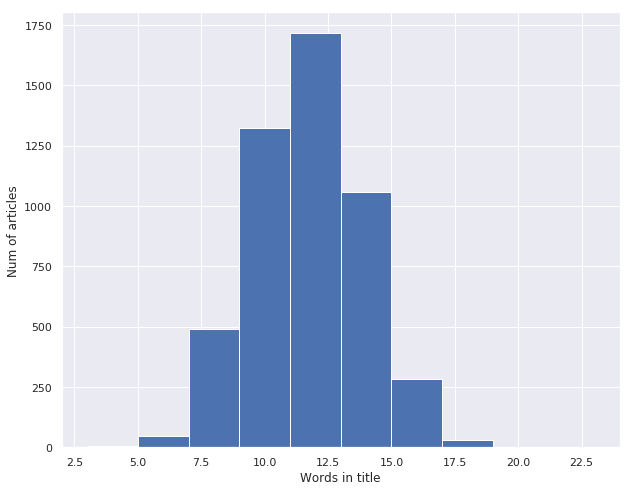

In [5]:
df["n_tokens_title"].hist()
plt.xlabel("Words in title")
plt.ylabel("Num of articles")

Text(0, 0.5, 'Shares')

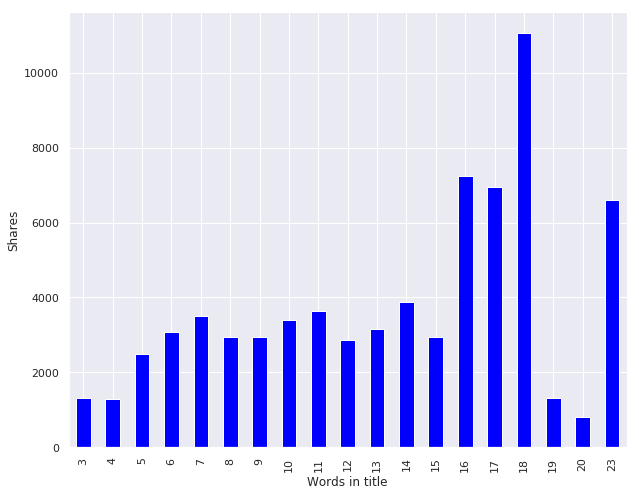

In [6]:
title = df.groupby('n_tokens_title')['shares'].mean()
title.plot(kind="bar", color="blue")
plt.xlabel("Words in title")
plt.ylabel("Shares")

Histogram looks familiar to normal distribution. We can say that more popular article have more words in title, unless 19 and 20 words.

#### Який фактор більше впливає на популярність статті --- кількість картинок чи відеороликів?

Spearman correlation for imgs: 0.08722662666962046 p-value: 7.76832618322725e-10
Spearman correlation for videos: 0.06673509493481497 p-value: 2.5865902829749333e-06


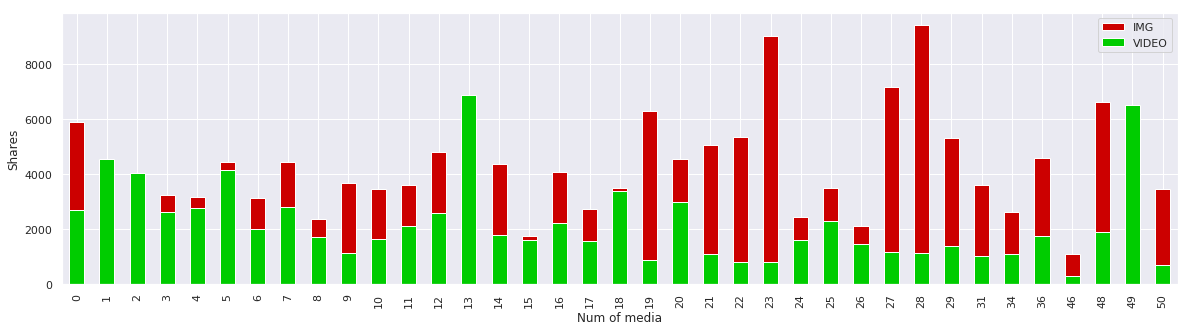

In [7]:
# Your code
plt.figure(figsize=(20, 5))
plt.tight_layout()
img_arr = df.groupby('num_imgs')['shares'].mean()
video_arr = df.groupby('num_videos')['shares'].mean()
img_arr.plot(kind="bar", color="#CC0000")
video_arr.plot(kind="bar", color="#00CC00")
plt.xlabel("Num of media")
plt.ylabel("Shares")
plt.legend (('IMG', 'VIDEO'))


r1 = spearmanr(df['num_imgs'], df['shares'])
r2 = spearmanr(df['num_videos'], df['shares'])
print('Spearman correlation for imgs:', r1[0], 'p-value:', r1[1])
print('Spearman correlation for videos:', r2[0], 'p-value:', r2[1])

We see that video less popular than images, except for 1, 2, 13 and 49 count. Almost equal for 3-5, 8, 18. And we can see that Spearman correlation for imgs bigger than for videos. So imgs better affect.

#### Чи правильно, що статті, які публікувалися у вихідні, в середньому популярніші, ніж статті, опубліковані в робочі дні? Придумайте відповідну візуалізацію.

Text(0, 0.5, 'Shares')

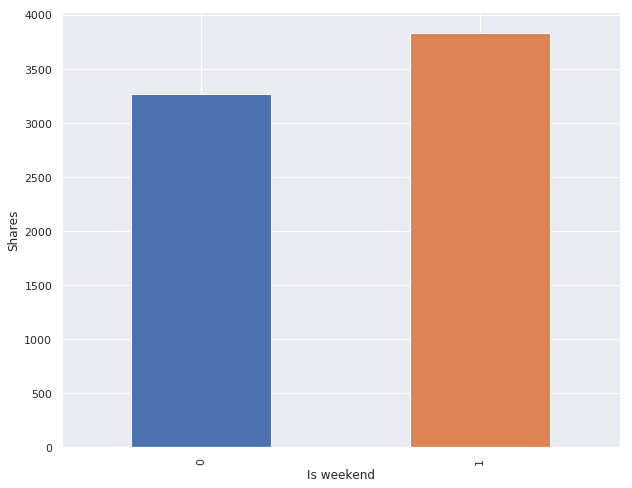

In [8]:
df.groupby('is_weekend')['shares'].mean().plot(kind='bar') 
plt.xlabel("Is weekend")
plt.ylabel("Shares")

Yes, it is 

#### Чи є взаємозв'язок між довжиною тексту (кількістю слів) та популярністю статті?

Spearman correlation: -0.0865387311504998 p-value: 1.0546662956868763e-09


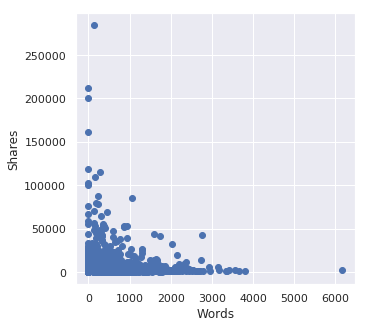

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(df['n_tokens_content'], df['shares']);
plt.xlabel("Words")
plt.ylabel("Shares")

r = spearmanr(df['n_tokens_content'], df['shares'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

We see that more popular articles have less words. ```p-value<0.5``` and ```Spearman correlation < 0```, so relation is negative, but small little relation.

#### Які ще інсайти можна знайти в наявних даних? Творче завдання.

We have insit variable like ```data_channel_is_world```. We can say that theme world have negative relation for out shares.

In [10]:
categories = [ 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 
'data_channel_is_world']
categories_names = list(map(lambda x: x.split("_")[3].capitalize(), categories))
for i in range(len(categories)): 
    point, p_value = pointbiserialr(df[categories[i]], df['shares'])
    print(categories_names[i], ": ", "pointbiseria=", point, ", p-value=", p_value, sep="")

Entertainment: pointbiseria=-0.019966592478610847, p-value=0.15998345868887578
Bus: pointbiseria=-0.029795220321972526, p-value=0.03598802428310134
Socmed: pointbiseria=-0.006927393870876837, p-value=0.6259288039833899
Tech: pointbiseria=-0.01802661009729775, p-value=0.2045910208201889
World: pointbiseria=-0.06536245089694125, p-value=4.139019492123151e-06


We also have insit variables like ```avg_positive_polarity, avg_negative_polarity and num_hrefs```, but have less relation with ```shares```

Spearman correlation: 0.041950896247212356 p-value: 0.003144427336885638


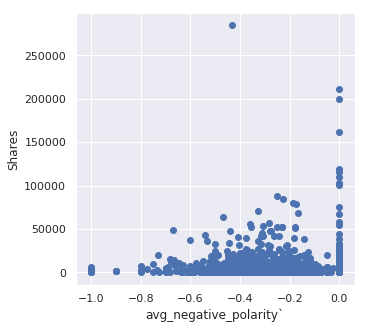

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(df['avg_negative_polarity'], df['shares']);
plt.xlabel("avg_negative_polarity`")
plt.ylabel("Shares")

r = spearmanr(df['avg_negative_polarity'], df['shares'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

Spearman correlation: 0.02623013313945759 p-value: 0.0648848522316595


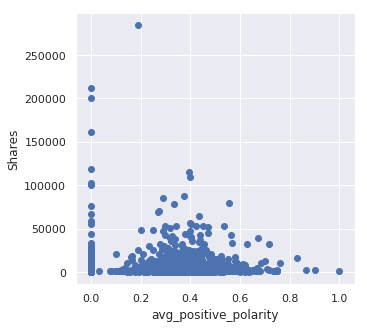

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(df['avg_positive_polarity'], df['shares']);
plt.xlabel("avg_positive_polarity")
plt.ylabel("Shares")

r = spearmanr(df['avg_positive_polarity'], df['shares'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

Spearman correlation: 0.0382042975060529 p-value: 0.0071602132850689575


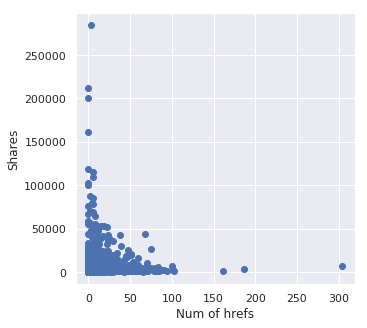

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(df['num_hrefs'], df['shares']);
plt.xlabel("Num of hrefs")
plt.ylabel("Shares")

r = spearmanr(df['num_hrefs'], df['shares'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

We can see that more populare articels have small relation for ```avg_negative_polarity``` and ```shares```, but do not have raltation with ```avg_positive_polarity``` and ```shares```. We alse have small relation for ```num_hrefs``` and ```shares```